<a href="https://colab.research.google.com/github/Adj95/python_dsc/blob/main/math_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mathmetical transformers**

# **fUNCTION tRANSFORMERS**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [3]:
df = pd.read_csv("/content/train (1).csv" , usecols =['Age' , 'Fare' , 'Survived'] )
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df['Age'].fillna(df['Age'].mean() , inplace= True)


/tmp/ipython-input-4-1020484457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean() , inplace= True)


In [5]:
x= df.iloc[:  ,1:3]
y = df.iloc[: , 0]

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)
x_train

,Age,Fare
140,29.699118,15.2458
439,31.000000,10.5000
817,31.000000,37.0042
378,20.000000,4.0125
491,21.000000,7.2500
...,...,...
835,39.000000,83.1583
192,19.000000,7.8542
629,29.699118,7.7333
559,36.000000,17.4000


/tmp/ipython-input-6-60344073.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'] , ax = ax[0])


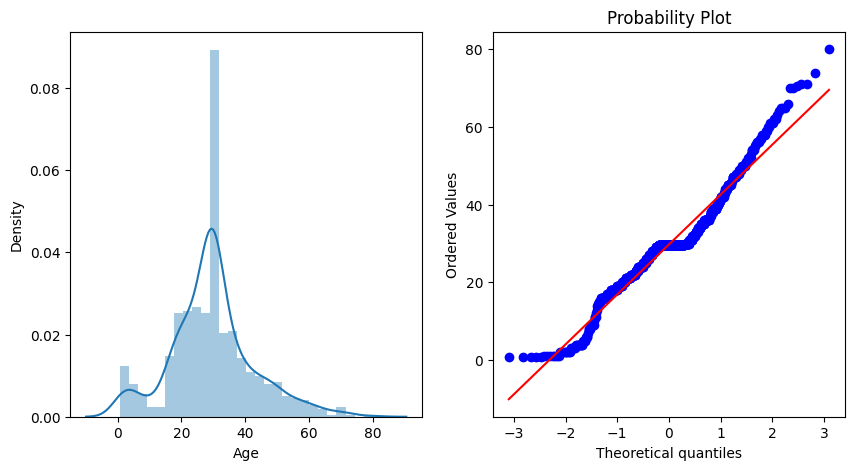

In [6]:
fig , ax = plt.subplots(1 , 2 , figsize = (10 , 5))
sns.distplot(x_train['Age'] , ax = ax[0])
stats.probplot( x_train['Age'] ,dist = 'norm' , plot =plt)
plt.show()


/tmp/ipython-input-7-4223881508.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'] , ax = ax[0])


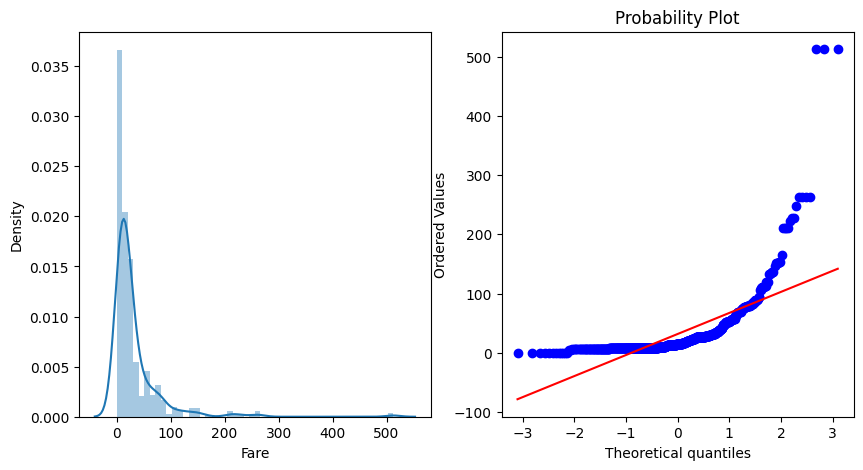

In [7]:
fig , ax = plt.subplots(1 , 2 , figsize = (10 , 5))
sns.distplot(x_train['Fare'] , ax = ax[0])
stats.probplot( x_train['Fare'] ,dist = 'norm' , plot =plt)
plt.show()

without using trnasformers

In [8]:
clf =LogisticRegression()
dlf = DecisionTreeClassifier()

In [9]:
clf.fit(x_train , y_train)
dlf.fit(x_train , y_train)

DecisionTreeClassifier()

In [10]:
y_pred = clf.predict(x_test)
y_pred1 = dlf.predict(x_test)

In [11]:
print(accuracy_score(y_test , y_pred))
print(accuracy_score(y_test , y_pred1))

0.6983240223463687
0.6759776536312849


# with using transformers

In [12]:
trf = FunctionTransformer(func = np.log1p)

In [14]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [15]:
clf =LogisticRegression()
dlf = DecisionTreeClassifier()

clf.fit(x_train_trf , y_train)
dlf.fit(x_train_trf , y_train)

y_pred = clf.predict(x_test_trf)
y_pred1 = dlf.predict(x_test_trf)

print(accuracy_score(y_test , y_pred))
print(accuracy_score(y_test , y_pred1))

0.7039106145251397
0.664804469273743


cross validation
calculates 10 times the ml algo and give mean results

In [18]:
x_transformed = trf.fit_transform(x)

clf =LogisticRegression()
dlf = DecisionTreeClassifier()

print(np.mean(cross_val_score(clf , x_transformed , y , scoring = 'accuracy' , cv = 10)))
print(np.mean(cross_val_score(dlf , x_transformed , y , scoring = 'accuracy' , cv = 10)))

0.678027465667915
0.6599875156054932


## **POWER TANSFORMERS **

In [31]:
from sklearn.preprocessing import  PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
df1 = pd.read_csv("/content/concrete_data.csv")
df1.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [23]:
x =df1.iloc[: , 0:8 ]
y = df1['Strength']
x_train ,x_test,y_train ,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

/tmp/ipython-input-26-589464215.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col] , ax=ax[0] )


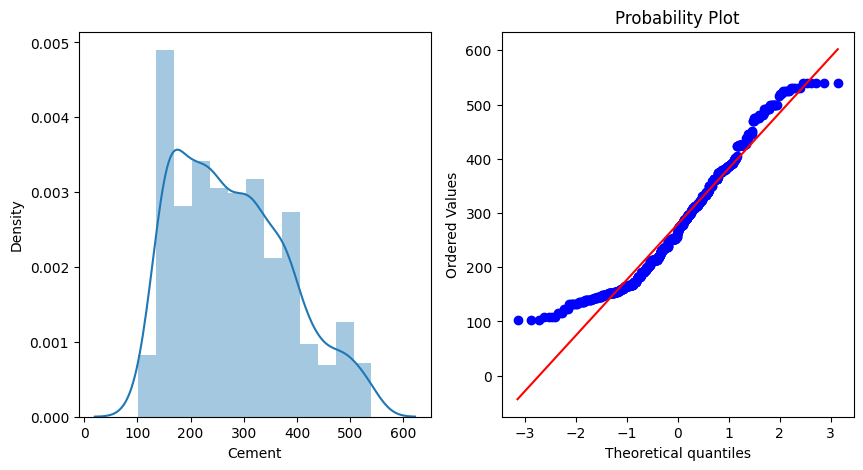

/tmp/ipython-input-26-589464215.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col] , ax=ax[0] )


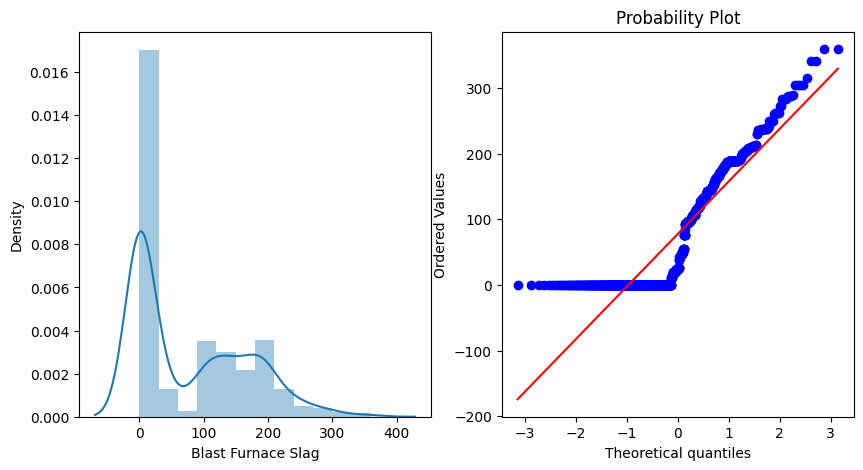

/tmp/ipython-input-26-589464215.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col] , ax=ax[0] )


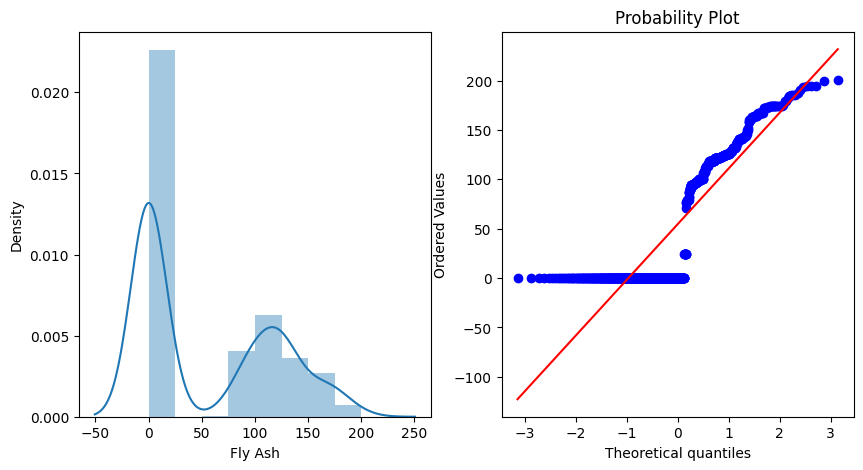

/tmp/ipython-input-26-589464215.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col] , ax=ax[0] )


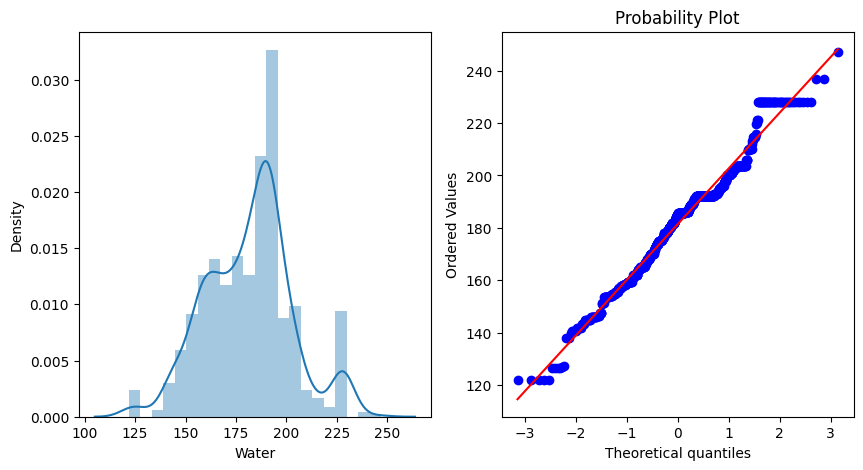

/tmp/ipython-input-26-589464215.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col] , ax=ax[0] )


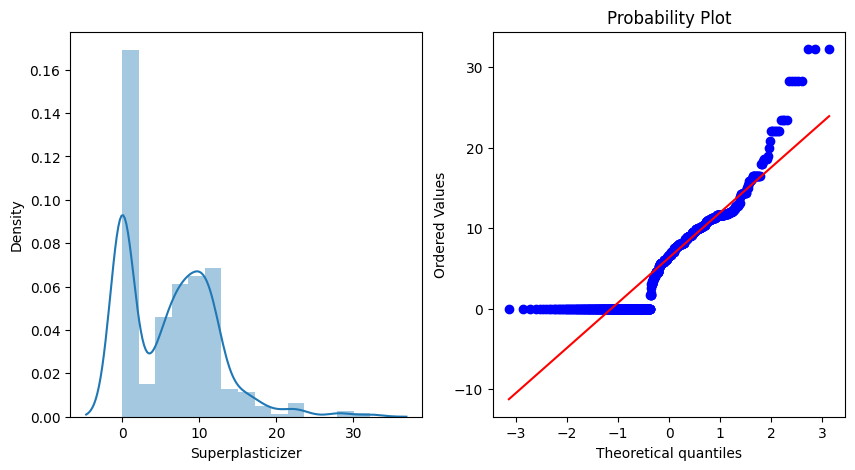

/tmp/ipython-input-26-589464215.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col] , ax=ax[0] )


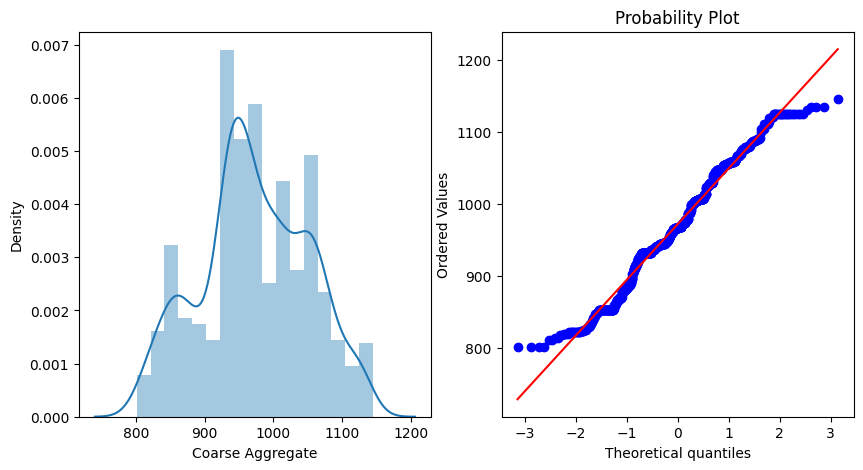

/tmp/ipython-input-26-589464215.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col] , ax=ax[0] )


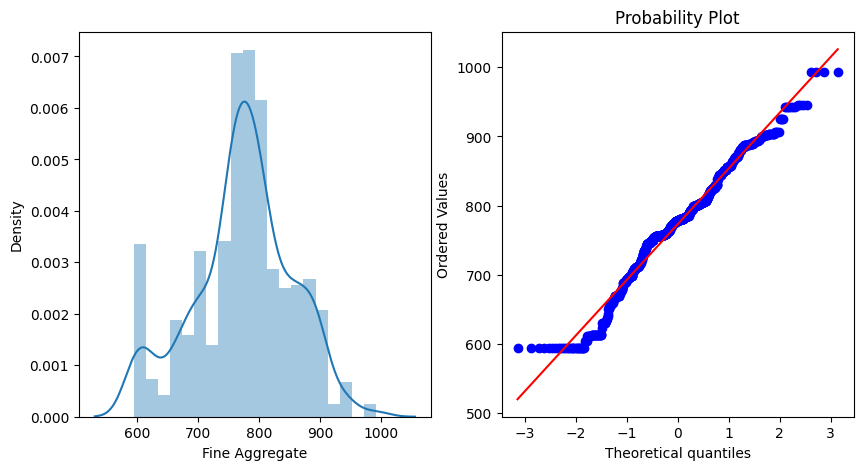

/tmp/ipython-input-26-589464215.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col] , ax=ax[0] )


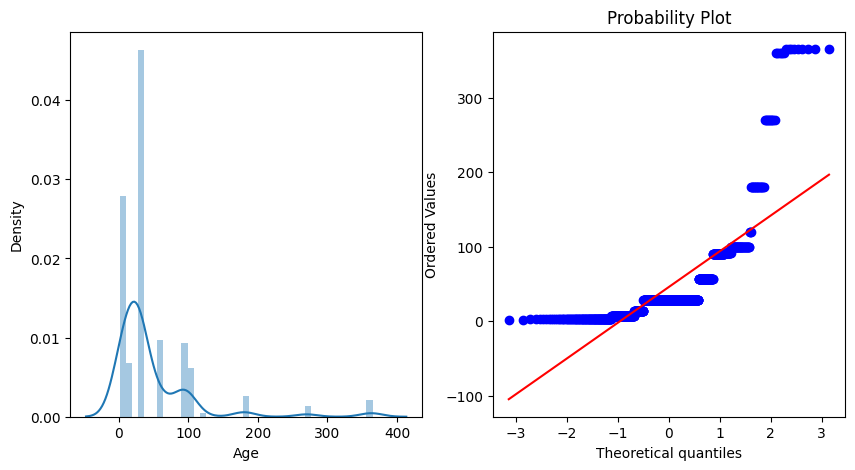

In [26]:
for col in x_train.columns:
  fig ,ax = plt.subplots(1,2 ,figsize=(10,5))
  sns.distplot(x_train[col] , ax=ax[0] )
  stats.probplot(x_train[col] , dist = 'norm' , plot = ax[1])
  plt.show()

In [27]:
pt = PowerTransformer(method= "box-cox")

x_train_transformed = pt.fit_transform(x_train+0.000001)
x_test_transformed = pt.transform(x_test+0.000001)



In [32]:
lr = LinearRegression()
lr.fit(x_train_transformed , y_train)
y_pred = lr.predict(x_test_transformed)
print(r2_score(y_test , y_pred))

0.8134350079356173
